1

In [1]:
import math
from scipy.misc import derivative


def f(nomber):
    return nomber - 2 * (math.e ** -nomber)


def bisection_method(a, b):
    i = 0
    while i < 3:
        i += 1
        c = (a + b) / 2
        if f(c) * f(b) < 0:
            a = c
        elif f(c) * f(b) > 0:
            b = c

    return c


print("After three iterations of the bisection method, x = " + str(bisection_method(0, 1)))


def chord_method(x_prev, x_curr):
    x_next = 0
    i = 0
    while i < 3:
        i += 1
        temp = x_next
        x_next = x_curr - (f(x_curr) * (x_prev - x_curr)) / (f(x_prev) - f(x_curr))
        x_prev = x_curr
        x_curr = temp

    return x_next


print("After three iterations of the chord method, x = " + str(chord_method(0, 1)))


def newtons_method(x_curr):
    i = 0
    x_next = x_curr - f(x_curr) / (derivative(f, x_curr, dx=1e-9))
    while i < 3:
        i += 1
        x_curr = x_next
        x_next = x_curr - f(x_curr) / (derivative(f, x_curr, dx=1e-9))

    return x_next


print("After three iterations of the Newton's method, x = " + str(newtons_method(1)))


def steffensen_root(xest):
    i = 0
    temp_x = xest
    while abs(f(xest)) > 0.000001:
        if i == 100:
            print("For 100 iterations, the desired accuracy is not achieved")
            return
        i += 1
        xest = temp_x - f(temp_x) ** 2 / (f(temp_x + f(temp_x)) - f(temp_x))
        temp_x = xest

    print("After " + str(i) + " iterations of the Steffensen root's method, x = " + str(xest))


steffensen_root(1)

After three iterations of the bisection method, x = 0.875
After three iterations of the chord method, x = 0.8590456379517001
After three iterations of the Newton's method, x = 0.8526055020137255
After 3 iterations of the Steffensen root's method, x = 0.8526054936037544


function [x] = steffensen(func, x0)
  cnt = 0;
  x1 = x0 - ((func(x0)^2)) / (func(x0 + func(x0)) - func(x0));
  while abs(x1 - x0) > (1*10^(-6))
    x0 = x1;
    x1 =  x0 - ((func(x0)^2)) / (func(x0 + func(x0)) - func(x0));
    cnt += 1;
    if cnt >=  100
      disp("Too many iterations");
      disp(x1);
    endif
  endwhile
  disp(x1)
endfunction

>> steffensen(@(x)x - 2 * e ** - x,1)
0.85261

2

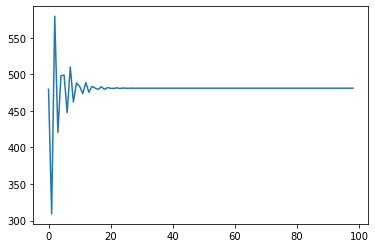

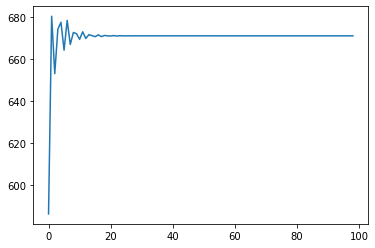

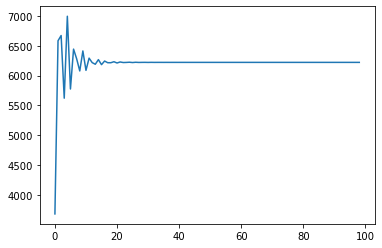

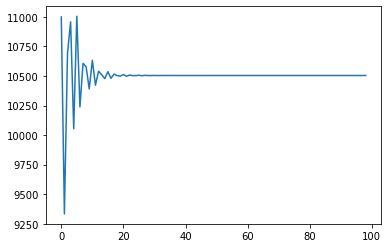

After 100 iterations of fixed point method, T_c = 481.0272546990047, T_h = 671.1239779386548, J_c = 6222.2250824538205, J_h = 10504.194933130066 


In [3]:
import matplotlib.pyplot as plt
from math import fabs


def fun_T_c(j_c, t_c):
    return ((j_c - 17.41 * t_c + 5188.18) / (5.67 * 1.0e-8)) ** (1 / 4)


def fun_T_h(j_h, t_h):
    return ((2250 + j_h - 1.865 * t_h) / (5.67 * 1.0e-8)) ** (1 / 4)


def fun_J_c(j_h, t_c):
    return 2352.71 + 0.71 * j_h - 7.46 * t_c


def fun_J_h(j_c, t_h):
    return 11093 + 0.71 * j_c - 7.46 * t_h


def fixed_point(t_c0=298, t_h0=298, j_c0=3000, j_h0=5000, eps=1e-6):
    T_c = fun_T_c(j_c0, t_c0)
    T_h = fun_T_h(j_h0, t_h0)
    J_c = fun_J_c(j_h0, t_c0)
    J_h = fun_J_h(j_c0, t_h0)
    i = 1
    tc_plot, th_plot, jc_plot, jh_plot = [], [], [], []

    # while (fabs(T_c - t_c0) + fabs(T_h - t_h0) + fabs(J_c - j_c0) + fabs(J_h - j_h0)) >= eps:
    while i < 100:
        i += 1
        tc_plot.append(fabs(T_c))
        th_plot.append(fabs(T_h))
        jc_plot.append(fabs(J_c))
        jh_plot.append(fabs(J_h))

        t_c0 = T_c
        t_h0 = T_h
        j_c0 = J_c
        j_h0 = J_h

        T_c = fun_T_c(j_c0, t_c0)
        T_h = fun_T_h(j_h0, t_h0)
        J_c = fun_J_c(j_h0, t_c0)
        J_h = fun_J_h(j_c0, t_h0)

    plt.plot(tc_plot)
    plt.show()
    plt.plot(th_plot)
    plt.show()
    plt.plot(jc_plot)
    plt.show()
    plt.plot(jh_plot)
    plt.show()

    print(f"After 100 iterations of fixed point method, T_c = {T_c}, T_h = {T_h}, J_c = {J_c}, J_h = {J_h} ")


fixed_point()

3

Enter accuracy: 0.000001
Regula: given accuracy 1e-06 achieved, x = 3.431847521378669


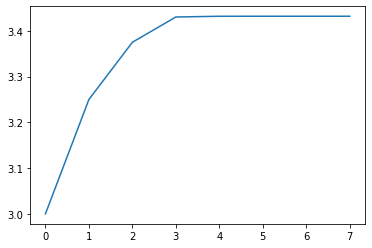

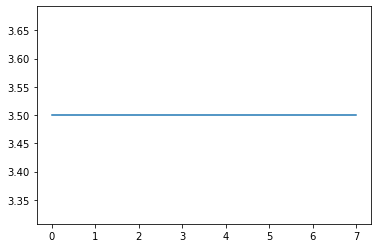

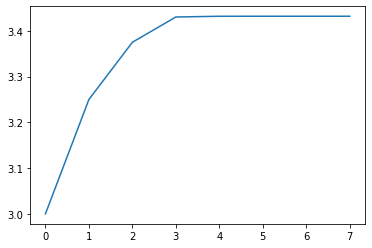

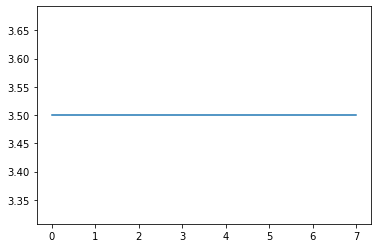

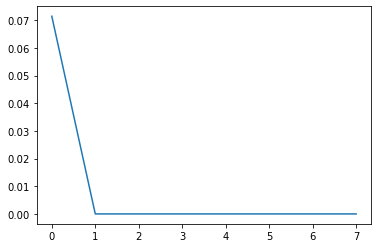

In [4]:
import matplotlib.pyplot as plt
from math import fabs


def f(x):
    return 2 * x ** 3 - 4 * x ** 2 - 4 * x - 20


def bi_reg(a, b, eps):
    plot_reg_a, plot_reg_b, plot_bis_a, plot_bis_b, plot_err_max = [], [], [], [], []
    x_ns_prev = (a + b) / 2

    if f(a) == 0:
        return a
    if f(b) == 0:
        return b

    c = (b - a) / 2
    xi = a + c

    if f(a) * f(xi) < 0:
        b = xi
    else:
        a = xi

    temp_a = a
    temp_b = b

    x_ns_curr = (a + b) / 2
    err_max = fabs((x_ns_curr - x_ns_prev) / x_ns_prev)
    i = 0

    reg_a = bis_a = a
    reg_b = bis_b = b
    reg_c = c

    while True:
        if i > 0:
            x_ns_prev = x_ns_curr

        x_ns_curr = (a + b) / 2
        err_max = fabs((x_ns_curr - x_ns_prev) / x_ns_prev)

        plot_reg_a.append(fabs(reg_a))
        plot_reg_b.append(fabs(reg_b))
        plot_bis_a.append(fabs(bis_a))
        plot_bis_b.append(fabs(bis_b))
        plot_err_max.append(fabs(err_max))

        # bisection
        if (bis_b - bis_a) <= eps:
            print(f"Bisection: given accuracy {eps} achieved, x = {xi}")
            break

        bis_c = (bis_b - bis_a) / 2
        xi = bis_c + bis_a

        if f(bis_a) * f(xi) < 0:
            bis_b = xi
        else:
            bis_a = xi

        # regula
        if f(reg_a) * f(reg_b) > 0:
            print("Regula: incorrect interval")
            break
        else:
            if fabs(f(reg_c)) <= eps:
                print(f"Regula: given accuracy {eps} achieved, x = {reg_c}")
                break

            reg_c = reg_b - (f(reg_b) * (reg_b - reg_a)) / (f(reg_b) - f(reg_a))

            if f(reg_a) * f(reg_c) < 0:
                reg_b = reg_c
            else:
                reg_a = reg_c

        # choosing the best approximation
        if fabs(xi - err_max) < fabs(reg_c - err_max):
            reg_c = xi
            reg_a = bis_a
            reg_b = bis_b
        else:
            xi = reg_c
            bis_a = reg_a
            bis_b = reg_b

        i += 1
        if i == 100:
            print(f"Too many iterations. Accuracy = {eps}, bisection: x = {xi}, regula: x = {reg_c}")

    plt.plot(plot_reg_a)
    plt.show()
    plt.plot(plot_reg_b)
    plt.show()
    plt.plot(plot_bis_a)
    plt.show()
    plt.plot(plot_bis_b)
    plt.show()
    plt.plot(plot_err_max)
    plt.show()


a = 3
b = 4
eps = float(input("Enter accuracy: "))

bi_reg(a, b, eps)

4

In [2]:
def f(x):
    return 2 * x ** 3 - 4 * x ** 2 - 4 * x - 20


def bisection_method(eps, a, b):
    if f(a) == 0:
        print(f"Using the bisection method with epsilon = {eps},x = {a}")
    if f(b) == 0:
        print(f"Using the bisection method with epsilon = {eps},x = {b}")
    while (b - a) > eps:
        c = (b - a) / 2
        xi = c + a
        if f(a) * f(xi) < 0:
            b = xi
        else:
            a = xi

    print(f"Using the bisection method with epsilon = {eps},x = {xi}")


a = 3
b = 4
eps = float(input("Enter accuracy: "))

bisection_method(eps, a, b)

Enter accuracy: 0.000001
Using the bisection method with epsilon = 1e-06,x = 3.43184757232666


roots([2, -4, -4, -20]) ans =

>>3.43185 + 0.00000i
-0.71592 + 1.54962i
-0.71592 - 1.54962i

5

In [2]:
from scipy.misc import derivative
from math import log, fabs


def f(x):
    return 0.1 * x ** 2 - x * log(x)


def my_newtons(x_curr, eps):
    i = 1
    file = open("5.txt", 'w')
    x_next = x_curr - (f(x_curr) / derivative(f, x_curr, dx=1e-9))

    while abs(x_next - x_curr) >= eps:
        file.write("It: " + str(i) + " eps: " + str(eps) + " f(x_curr): " + str(f(x_curr)) + " x_curr: " + str(
            x_curr) + " x_next: " + str(x_next) + '\n')
        x_curr = x_next
        x_next = x_curr - (f(x_curr) / derivative(f, x_curr, dx=1e-9))
        i += 1

    if f(x_next + eps) * f(x_next - eps) < 0:
        print(f"Newton's method: with a given accuracy = {eps}, x = {x_next}")
    else:
        print(f"Newton's method: error. The answer is not contained in the interval [{x_next} - {eps}, {x_next + eps}")

    file.close()


def my_iterations(x_curr, eps):
    lamda = 1 / derivative(f, x_curr, dx=1e-9)
    x_next = x_curr - lamda * f(x_curr)

    while fabs(x_next - x_curr) >= eps:
        x_curr = x_next
        x_next = x_curr - lamda * f(x_curr)

    return x_next


eps = float(input("Enter the desired accuracy: "))
my_newtons(1.0, eps)
print(f"Iterations method: with a given accuracy = {eps}, x = " + str(my_iterations(1.0, eps)))

Enter the desired accuracy: 0.000001
Newton's method: with a given accuracy = 1e-06, x = 1.1183255915896297
Iterations method: with a given accuracy = 1e-06, x = 1.118325603829918


6

In [7]:
from math import fabs
from numpy import array
from numpy.linalg import solve
from sympy import diff, tan, symbols


def calc_f1(x, y):
    return tan(x * y + 0.1) - 2 * x ** 2


def calc_f2(x, y):
    return 0.6 * x ** 2 + 2 * y ** 2 - 1


def partial_diffs(func, x_0, y_0):
    x, y = symbols('x y')

    df_x = diff(func(x, y), x)
    df_y = diff(func(x, y), y)

    return df_x.subs(x, x_0).subs(y, y_0), df_y.subs(x, x_0).subs(y, y_0)


def newtons_method(x_curr, y_curr, eps):
    file = open("6.txt", 'w')
    i = 1

    f1 = calc_f1(x_curr, y_curr)
    f2 = calc_f2(x_curr, y_curr)

    while fabs(f1) > eps and fabs(f2) > eps:
        df_dx, df_dy = partial_diffs(calc_f1, x_curr, y_curr)
        df2_dx, df2_dy = partial_diffs(calc_f2, x_curr, y_curr)

        jac = array([[df_dx, df_dy], [df2_dx, df2_dy]], dtype='f4')
        func_vector = array([-f1, -f2], dtype='f4')
        delta_vector = solve(jac, func_vector)

        x_curr += delta_vector.item(0)
        y_curr += delta_vector.item(1)

        f1 = calc_f1(x_curr, y_curr)
        f2 = calc_f2(x_curr, y_curr)

        file.write("It: " + str(i) + " eps: " + str(eps) + " f1: " + str(f1) + " f2: " + str(f2) + " x_curr: " + str(
            x_curr) + " y_curr: " + str(y_curr) + '\n')

        i += 1

    file.close()
    return x_curr, y_curr


eps = float(input("Enter accuracy: "))
print(f"Newton's method: with a given accuracy = {eps}, x, y = " + str(newtons_method(0.5, 0.5, eps)))


Enter accuracy: 0.000001
Newton's method: with a given accuracy = 1e-06, x, y = (0.46357748124501086, 0.6599461512814742)
